In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

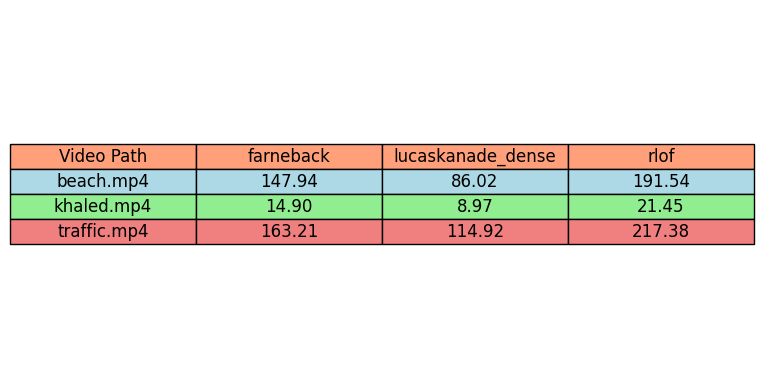

In [10]:
import matplotlib.pyplot as plt

# Data
data = [
    ('khaled.mp4', 'lucaskanade_dense', 8.969589948654175),
    ('beach.mp4', 'lucaskanade_dense', 86.01669263839722),
    ('traffic.mp4', 'lucaskanade_dense', 114.92154431343079),
    ('traffic.mp4', 'farneback', 163.20672845840454),
    ('khaled.mp4', 'farneback', 14.897222518920898),
    ('beach.mp4', 'farneback', 147.9391975402832),
    ('traffic.mp4', 'rlof', 217.38064408302307),
    ('khaled.mp4', 'rlof', 21.44838047027588),
    ('beach.mp4', 'rlof', 191.54016637802124)
]

# Extracting unique video paths and algorithms
video_paths = sorted(list(set([entry[0] for entry in data])))
algorithms = sorted(list(set([entry[1] for entry in data])))

# Creating a dictionary to store timings for each video path and algorithm combination
timing_data = {(video, algorithm): None for video in video_paths for algorithm in algorithms}

for entry in data:
    timing_data[(entry[0], entry[1])] = entry[2]

# Creating the table plot
fig, ax = plt.subplots()
ax.axis('off')
table_data = []

header_row = ['Video Path'] + algorithms
table_data.append(header_row)

# Data rows
for video_path in video_paths:
    row = [video_path]
    for algorithm in algorithms:
        timing = timing_data[(video_path, algorithm)]
        if timing is not None:
            timing = f"{timing:.2f}"  # Format to 2 decimal places if timing exists
        row.append(timing)
    table_data.append(row)

# Generating the table without specifying colColours
table = ax.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

# Assigning different colors to each column
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']
for col in range(len(algorithms) + 1):  # +1 for the video path column
    for cell in table._cells:
        if cell[0] == col:
            table._cells[cell].set_facecolor(colors[col - 1])  # -1 to skip the video path column

plt.show()